<a href="https://colab.research.google.com/github/DataGalz/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries and uploading the data

In [75]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.model_selection import GridSearchCV





In [5]:

url = 'https://raw.githubusercontent.com/DataGalz/CIND820/main/BCPI_MONTHLY-sd-1972-01-01.csv'

data = pd.read_csv(url)
df = pd.DataFrame(data)
print(df)
#converted the data into a dataframe




           date  M.BCPI  M.BCNE   M.ENER  M.MTLS   M.FOPR  M.AGRI   M.FISH
0    1972-01-01  100.00  100.00   100.00  100.00   100.00  100.00   100.00
1    1972-02-01  100.40  100.53    99.78  100.74   100.12  101.20    88.89
2    1972-03-01  101.11  101.35   100.05  101.38   100.24  102.53    98.97
3    1972-04-01  101.16  101.45    99.84  101.21   100.95  102.08   103.10
4    1972-05-01  101.88  102.30   100.00  101.25   102.32  103.53    86.30
..          ...     ...     ...      ...     ...      ...     ...      ...
592  2021-05-01  603.08  524.90  1173.22  733.52  1101.94  310.20  1451.32
593  2021-06-01  606.63  488.98  1289.50  720.94   838.80  306.31  1534.54
594  2021-07-01  593.87  455.44  1334.47  730.52   536.88  321.88  1737.96
595  2021-08-01  568.19  440.31  1261.77  738.36   437.00  328.36  1658.92
596  2021-09-01  596.69  446.58  1378.81  749.09   477.69  315.44  1718.73

[597 rows x 8 columns]


# Exploring the Dataset

In [6]:
df.dtypes
#checking the type of data

date       object
M.BCPI    float64
M.BCNE    float64
M.ENER    float64
M.MTLS    float64
M.FOPR    float64
M.AGRI    float64
M.FISH    float64
dtype: object

In [7]:
df.head(5)
# the first 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,100.53,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,101.35,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,101.45,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,102.30,100.00,101.25,102.32,103.53,86.30


In [8]:
df.tail(5)
#the last 5 rows of the data

,date,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
592,2021-05-01,603.08,524.90,1173.22,733.52,1101.94,310.20,1451.32
593,2021-06-01,606.63,488.98,1289.50,720.94,838.80,306.31,1534.54
594,2021-07-01,593.87,455.44,1334.47,730.52,536.88,321.88,1737.96
595,2021-08-01,568.19,440.31,1261.77,738.36,437.00,328.36,1658.92
596,2021-09-01,596.69,446.58,1378.81,749.09,477.69,315.44,1718.73


In [9]:
#Describe the dataset 
df.describe()


,M.BCPI,M.BCNE,M.ENER,M.MTLS,M.FOPR,M.AGRI,M.FISH
count,597.000000,597.00000,597.000000,597.000000,597.000000,597.000000,597.000000
mean,342.790369,253.76072,759.306265,360.757705,282.288224,191.433317,683.961642
std,148.170932,79.38940,477.890514,177.418661,107.034746,46.860202,403.135415
min,100.000000,100.00000,99.780000,100.000000,100.000000,100.000000,86.300000
25%,250.800000,197.67000,407.970000,237.160000,201.320000,160.550000,262.270000
50%,286.330000,232.47000,635.920000,283.060000,278.370000,178.300000,717.250000
75%,420.880000,320.50000,982.080000,536.440000,337.070000,210.920000,985.100000
max,881.310000,524.90000,2755.750000,779.920000,1101.940000,328.360000,1831.730000


In [10]:
#Renaming columns for ease
df_new = df.rename(columns={'M.BCPI': 'Total_CPI', 'M.AGRI': 'CPI_Agri', 'M.BCNE': 'CPI_NonEner', 'M.ENER': 'CPI_Ener','M.MTLS': 'CPI_Metals', 'M.FOPR': 'CPI_Forst', 'M.FISH': 'CPI_Fish'})
print(df_new)

           date  Total_CPI  CPI_NonEner  ...  CPI_Forst  CPI_Agri  CPI_Fish
0    1972-01-01     100.00       100.00  ...     100.00    100.00    100.00
1    1972-02-01     100.40       100.53  ...     100.12    101.20     88.89
2    1972-03-01     101.11       101.35  ...     100.24    102.53     98.97
3    1972-04-01     101.16       101.45  ...     100.95    102.08    103.10
4    1972-05-01     101.88       102.30  ...     102.32    103.53     86.30
..          ...        ...          ...  ...        ...       ...       ...
592  2021-05-01     603.08       524.90  ...    1101.94    310.20   1451.32
593  2021-06-01     606.63       488.98  ...     838.80    306.31   1534.54
594  2021-07-01     593.87       455.44  ...     536.88    321.88   1737.96
595  2021-08-01     568.19       440.31  ...     437.00    328.36   1658.92
596  2021-09-01     596.69       446.58  ...     477.69    315.44   1718.73

[597 rows x 8 columns]


In [11]:
print("The new columns in the Dataset are:\n",df_new.columns)

The new columns in the Dataset are:
 Index(['date', 'Total_CPI', 'CPI_NonEner', 'CPI_Ener', 'CPI_Metals',
       'CPI_Forst', 'CPI_Agri', 'CPI_Fish'],
      dtype='object')


In [12]:
#Checking the skewness and kurtosis of Total CPI, moderately skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['Total_CPI'].skew())
print("Kurtosis: %f" % df_new['Total_CPI'].kurt())

Skewness: 0.950204
Kurtosis: 0.217021


In [13]:
#Checking the skewness and kurtosis of CPI Energy, heavily skewed  kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Ener'].skew())
print("Kurtosis: %f" % df_new['CPI_Ener'].kurt())


Skewness: 1.053477
Kurtosis: 0.698279


In [14]:
#Checking the skewness and kurtosis of CPI Metals, moderately skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Metals'].skew())
print("Kurtosis: %f" % df_new['CPI_Metals'].kurt())

Skewness: 0.727674
Kurtosis: -0.783938


In [15]:
#Checking the skewness and kurtosis of CPI Energy , heavilty skewed kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Agri'].skew())
print("Kurtosis: %f" % df_new['CPI_Agri'].kurt())

Skewness: 1.081845
Kurtosis: 0.736573


In [16]:
#Checking the skewness and kurtosis of CPI Forestry, heavilty skewed, kurtosis at extreemes distribution thin and tall lepyokurtic
print("Skewness: %f" % df_new['CPI_Forst'].skew())
print("Kurtosis: %f" % df_new['CPI_Forst'].kurt())

Skewness: 1.959044
Kurtosis: 9.805375


In [17]:
#Checking the skewness and kurtosis of CPI Fish, fairly skewed, kurtosis moderately spread out platykurtic
print("Skewness: %f" % df_new['CPI_Fish'].skew())
print("Kurtosis: %f" % df_new['CPI_Fish'].kurt())

Skewness: 0.170690
Kurtosis: -1.106872


In [18]:
min(df_new.Total_CPI)
#checking the year and month where the CPI was lowest

100.0

In [19]:
max(df_new.Total_CPI)

#checking the year and month where the CPI was highest

881.31

In [20]:
max(df_new.date)

'2021-09-01'

In [21]:
df_new.isnull().sum()
#checking for null values

date           0
Total_CPI      0
CPI_NonEner    0
CPI_Ener       0
CPI_Metals     0
CPI_Forst      0
CPI_Agri       0
CPI_Fish       0
dtype: int64

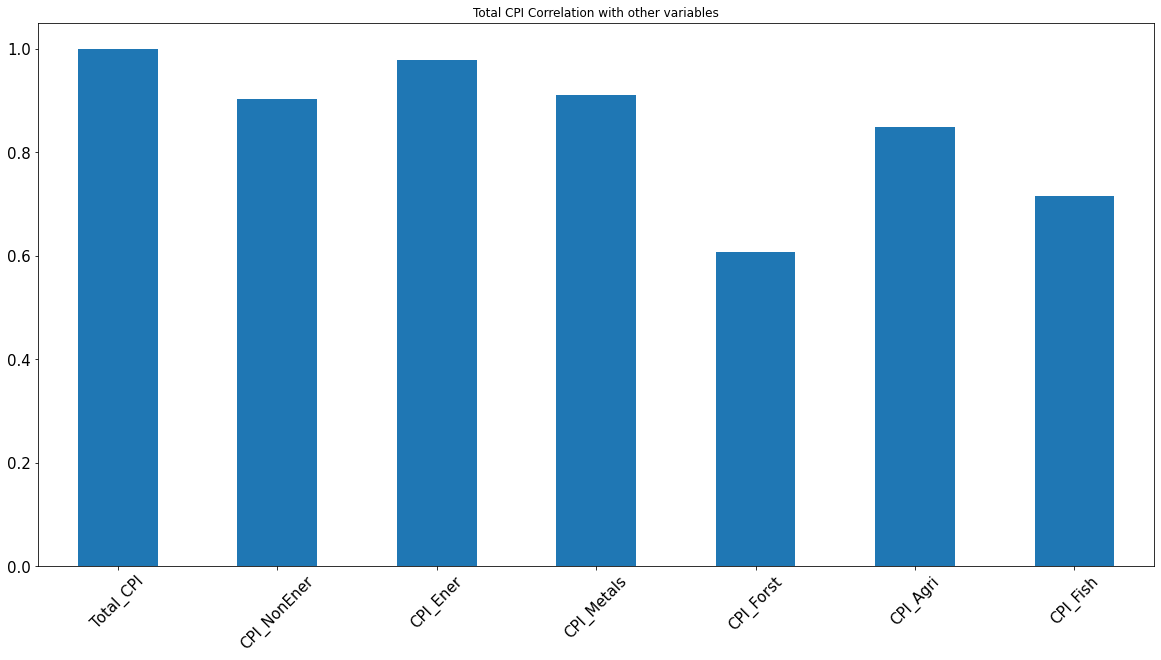

In [22]:
df_new.corrwith(df_new.Total_CPI).plot.bar(
figsize = (20, 10), title = "Total CPI Correlation with other variables", fontsize = 15, rot = 45, grid = False)

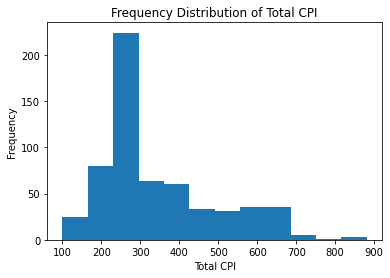

In [23]:
plt.hist(x=df_new['Total_CPI'], bins=12)
plt.xlabel("Total CPI")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Total CPI")
plt.show()

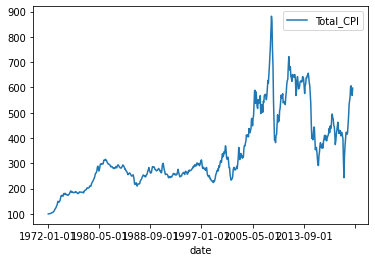

In [24]:
ax = df_new.plot(x='date', y='Total_CPI', rot=0)
plt.legend()


,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.903644,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_NonEner,0.903644,1.000000,0.804170,0.967183,0.822376,0.874488,0.830922
CPI_Ener,0.977267,0.804170,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.967183,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.822376,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.874488,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.830922,0.631449,0.763231,0.810035,0.598726,1.000000


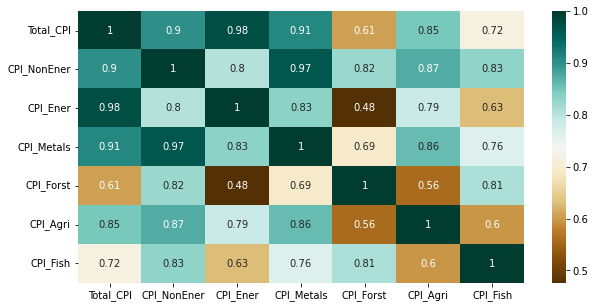

In [25]:
plt.figure(figsize=(10,5))
cor= df_new.corr()
sns.heatmap(cor,cmap="BrBG",annot=True)
cor

#checking correcation of data to identify attributes that are highly correlated with each other

In [26]:
df1 = df_new.drop(['CPI_NonEner'], axis=1)
df1.head()


,date,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
0,1972-01-01,100.00,100.00,100.00,100.00,100.00,100.00
1,1972-02-01,100.40,99.78,100.74,100.12,101.20,88.89
2,1972-03-01,101.11,100.05,101.38,100.24,102.53,98.97
3,1972-04-01,101.16,99.84,101.21,100.95,102.08,103.10
4,1972-05-01,101.88,100.00,101.25,102.32,103.53,86.30


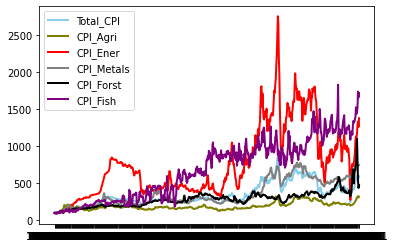

In [27]:
plt.plot( 'date', 'Total_CPI', data=df1, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'date', 'CPI_Agri', data=df1, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'CPI_Ener', data=df1, marker='', color='red', linewidth=2)
plt.plot( 'date', 'CPI_Metals', data=df1, marker='', color='grey', linewidth=2)
plt.plot( 'date', 'CPI_Forst', data=df1, marker='', color='black', linewidth=2)
plt.plot( 'date', 'CPI_Fish', data=df1, marker='', color='purple', linewidth=2)

# show legend
plt.legend()

# show graph
plt.show()

In [28]:

df1.corr()


,Total_CPI,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri,CPI_Fish
Total_CPI,1.000000,0.977267,0.910876,0.606498,0.848023,0.715992
CPI_Ener,0.977267,1.000000,0.833749,0.476074,0.788788,0.631449
CPI_Metals,0.910876,0.833749,1.000000,0.694953,0.859512,0.763231
CPI_Forst,0.606498,0.476074,0.694953,1.000000,0.558940,0.810035
CPI_Agri,0.848023,0.788788,0.859512,0.558940,1.000000,0.598726
CPI_Fish,0.715992,0.631449,0.763231,0.810035,0.598726,1.000000


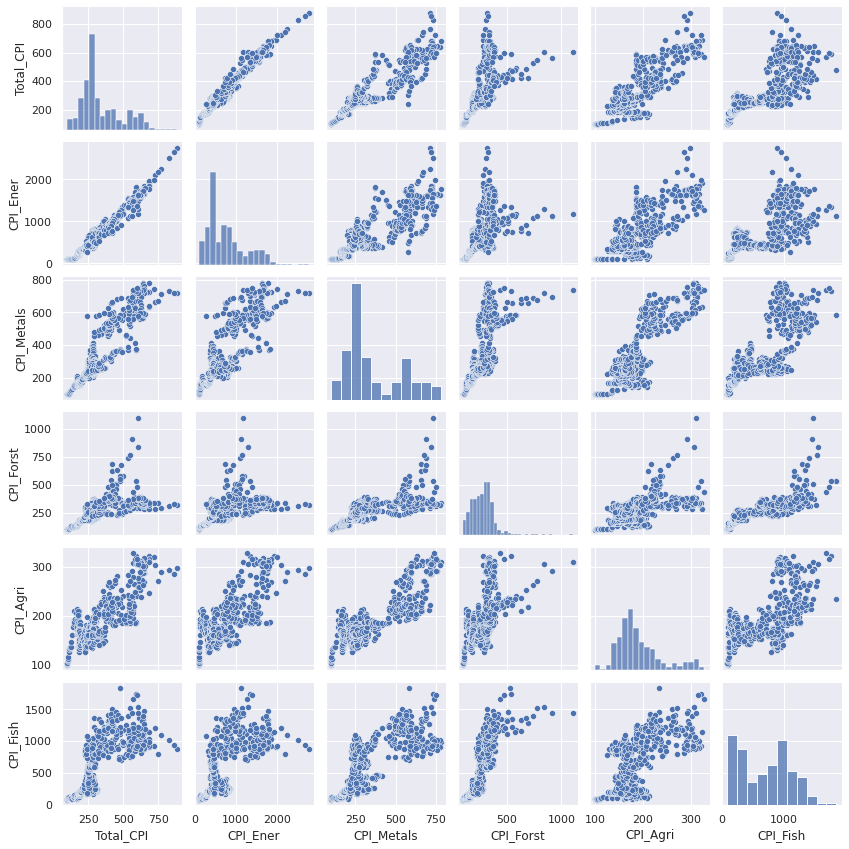

In [29]:

sns.set()
cols = ['Total_CPI', 'CPI_Ener', 'CPI_Metals', 'CPI_Forst', 'CPI_Agri', 'CPI_Fish']
sns.pairplot(df1[cols], height = 2)
plt.show()

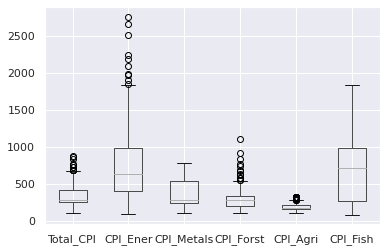

In [30]:
np.random.seed(19680801)

boxplot = df1.boxplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



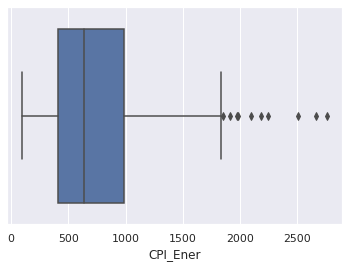

In [31]:
sns.boxplot(df1['CPI_Ener'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



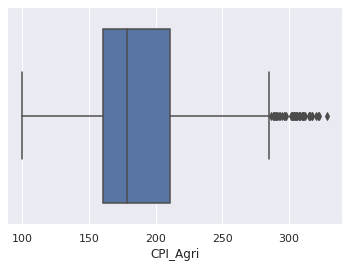

In [32]:
sns.boxplot(df1['CPI_Agri'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



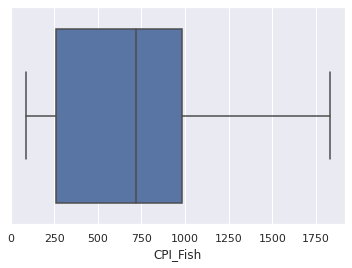

In [33]:
sns.boxplot(df1['CPI_Fish'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



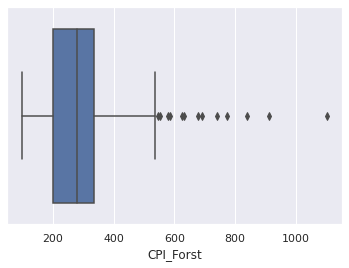

In [34]:
sns.boxplot(df1['CPI_Forst'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



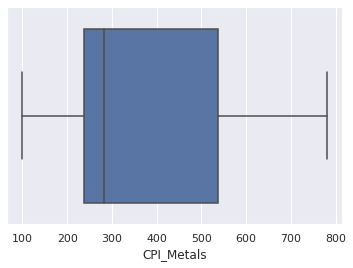

In [35]:
sns.boxplot(df1['CPI_Metals'])



In [36]:
X = df1[['CPI_Ener','CPI_Agri', 'CPI_Metals', 'CPI_Forst', 'CPI_Fish']] 
Y = df1['Total_CPI']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_CPI_Ener = 1400
New_CPI_Agri = 320
New_CPI_Metals = 800
New_CPI_Forst = 480
New_CPI_Fish = 2000
print ('Predicted Total CPI: \n', regr.predict([[New_CPI_Ener ,New_CPI_Agri, New_CPI_Metals, New_CPI_Forst, New_CPI_Fish ]]))



Intercept: 
 40.60803194721058
Coefficients: 
 [ 2.27563607e-01  1.93301242e-01  1.47859235e-01  1.38559609e-01
 -9.87455840e-05]
Predicted Total CPI: 
 [605.65198873]


In [37]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total_CPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.286e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4868.
Df Residuals:                     591   BIC:                             4895.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6080      3.275     12.400      0.0

In [38]:
df2 = df_new.drop(['CPI_Fish', 'date'], axis=1)
df2.head()

,Total_CPI,CPI_NonEner,CPI_Ener,CPI_Metals,CPI_Forst,CPI_Agri
0,100.00,100.00,100.00,100.00,100.00,100.00
1,100.40,100.53,99.78,100.74,100.12,101.20
2,101.11,101.35,100.05,101.38,100.24,102.53
3,101.16,101.45,99.84,101.21,100.95,102.08
4,101.88,102.30,100.00,101.25,102.32,103.53


In [39]:
X = df2[['CPI_Ener','CPI_Agri', 'CPI_Metals', 'CPI_Forst']] 
Y = df2['Total_CPI']
 
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_CPI_Ener = 1400
New_CPI_Agri = 320
New_CPI_Metals = 800
New_CPI_Forst = 480

print ('Predicted Total CPI: \n', regr.predict([[New_CPI_Ener ,New_CPI_Agri, New_CPI_Metals, New_CPI_Forst ]]))

Intercept: 
 40.61078877612749
Coefficients: 
 [0.22754493 0.19346887 0.14778091 0.13834725]
Predicted Total CPI: 
 [605.71513715]


In [40]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              Total_CPI   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.610e+04
Date:                Sun, 07 Nov 2021   Prob (F-statistic):               0.00
Time:                        23:06:11   Log-Likelihood:                -2428.2
No. Observations:                 597   AIC:                             4866.
Df Residuals:                     592   BIC:                             4888.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.6108      3.271     12.415      0.0

In [53]:
#Create train and test set
train , test = train_test_split(df2, test_size = 0.3)
x_train = train.drop('Total_CPI', axis=1)
y_train = train['Total_CPI']

x_test = test.drop('Total_CPI', axis = 1)
y_test = test['Total_CPI']

In [54]:
#Preprocessing – Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [63]:
#We will have a look at the error rate for different k values
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 19.12136055421906
RMSE value for k=  2 is: 19.153688265362028
RMSE value for k=  3 is: 19.132164088676674
RMSE value for k=  4 is: 20.29251092186201
RMSE value for k=  5 is: 21.126486306161862
RMSE value for k=  6 is: 22.85876909935561
RMSE value for k=  7 is: 24.45070175344315
RMSE value for k=  8 is: 25.134573367363426
RMSE value for k=  9 is: 25.765966517406863
RMSE value for k=  10 is: 26.40970169727195
RMSE value for k=  11 is: 26.93790518170469
RMSE value for k=  12 is: 27.347249635799702
RMSE value for k=  13 is: 27.734089139737648
RMSE value for k=  14 is: 28.40912248396555
RMSE value for k=  15 is: 29.040546754834924
RMSE value for k=  16 is: 29.4121121908017
RMSE value for k=  17 is: 29.94584089500379
RMSE value for k=  18 is: 30.53161577279413
RMSE value for k=  19 is: 30.832568890226714
RMSE value for k=  20 is: 31.1441195482122


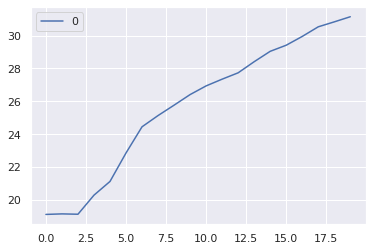

In [64]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) 
curve.plot()

In [76]:
#deciding the value of k
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [77]:
#preprocessing test dataset

x_test= pd.get_dummies(test)
test_scaled = scaler.fit_transform(test)
x_test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model.predict(test)
print(predict)


[604.855 716.35  716.35  604.855 716.35  604.855 798.145 798.145 716.35
 716.35  798.145 798.145 716.35  716.35  604.855 716.35  798.145 798.145
 716.35  798.145 716.35  798.145 798.145 716.35  798.145 798.145 798.145
 604.855 798.145 798.145 604.855 716.35  716.35  604.855 604.855 798.145
 604.855 604.855 798.145 798.145 798.145 604.855 604.855 798.145 716.35
 716.35  604.855 798.145 716.35  604.855 604.855 798.145 716.35  798.145
 716.35  716.35  716.35  798.145 798.145 604.855 798.145 798.145 798.145
 716.35  798.145 798.145 604.855 798.145 798.145 716.35  798.145 716.35
 716.35  716.35  716.35  716.35  798.145 716.35  798.145 798.145 604.855
 798.145 798.145 604.855 798.145 604.855 798.145 798.145 798.145 716.35
 604.855 798.145 798.145 604.855 798.145 716.35  604.855 604.855 716.35
 716.35  604.855 798.145 604.855 716.35  604.855 716.35  798.145 716.35
 716.35  716.35  798.145 716.35  798.145 716.35  798.145 604.855 716.35
 798.145 716.35  716.35  604.855 716.35  798.145 798.145 7